### Importing the data

In [18]:
import pandas as pd
import numpy as np
titanic = pd.read_csv("Titanic-Dataset.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S




## Part 1. Cleaning the data with Null Values.

In [19]:
titanic.shape# Means 891 rows and 12 columns.

(891, 12)

In [20]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**We use (sklearn.preprocessing.Imputer)**


In [21]:
from sklearn.impute import SimpleImputer
Imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
titanic['Age2'] = Imp_median.fit_transform(titanic['Age'].values.reshape(-1, 1)).flatten().astype(int)

print(titanic['Age2'].head())
#Lets drop the old one age Column.

0    22
1    38
2    26
3    35
4    35
Name: Age2, dtype: int32


In [22]:
#titanic.drop('Age',axis=1,inplace=True)


In [23]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age2             0
dtype: int64

In [24]:
print(titanic.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age2'],
      dtype='object')


In [25]:
titanic.set_index('PassengerId',inplace=True)
## get dummy variables for Column sex and embarked since they are categorical value.
titanic = pd.get_dummies(titanic, columns=["Sex"], drop_first=True)
titanic = pd.get_dummies(titanic, columns=["Embarked"],drop_first=True)


#Mapping the data.
titanic['Fare'] = titanic['Fare'].astype(int)
titanic.loc[titanic.Fare<=7.91,'Fare']=0
titanic.loc[(titanic.Fare>7.91) &(titanic.Fare<=14.454),'Fare']=1
titanic.loc[(titanic.Fare>14.454)&(titanic.Fare<=31),'Fare']=2
titanic.loc[(titanic.Fare>31),'Fare']=3

titanic['Age2']=titanic['Age2'].astype(int)
titanic.loc[ titanic['Age2'] <= 16, 'Age2']= 0
titanic.loc[(titanic['Age2'] > 16) & (titanic['Age2'] <= 32), 'Age2'] = 1
titanic.loc[(titanic['Age2'] > 32) & (titanic['Age2'] <= 48), 'Age2'] = 2
titanic.loc[(titanic['Age2'] > 48) & (titanic['Age2'] <= 64), 'Age2'] = 3
titanic.loc[titanic['Age2'] > 64, 'Age2'] = 4

In [26]:
# In our data the Ticket and Cabin,Name are the base less,leds to the false prediction so Drop both of them.
titanic.drop(['Ticket','Cabin','Name'],axis=1,inplace=True)
titanic.head()
print(titanic.Age2)

PassengerId
1      1
2      2
3      1
4      2
5      2
      ..
887    1
888    1
889    1
890    1
891    1
Name: Age2, Length: 891, dtype: int32


<h2 >Part 2.Exploratory data analysis</h2>.

**Exploratory data analysis (EDA)** 

In [27]:
titanic.shape
# 891 rows and 9 columns.

(891, 10)

In [28]:
titanic.Survived.value_counts()/len(titanic)*100
#This signifies almost 61% people in the ship died and 38% survived.

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [29]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,1.453423,1.288440,0.647587,0.086420,0.722783
std,0.486592,0.836071,14.526497,1.102743,0.806057,1.124206,0.812038,0.477990,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,2.000000,2.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,3.000000,4.000000,1.000000,1.000000,1.000000


In [30]:
titanic.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
Survived,,,,,,,,,
0,2.531876,30.626179,0.553734,0.329690,1.185792,1.31694,0.852459,0.085610,0.777778
1,1.950292,28.343690,0.473684,0.464912,1.883041,1.24269,0.318713,0.087719,0.634503


In [31]:
titanic.groupby('Sex_male').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare,Age2,Embarked_Q,Embarked_S
Sex_male,,,,,,,,,
0,0.742038,2.159236,27.915709,0.694268,0.649682,1.815287,1.210191,0.114650,0.646497
1,0.188908,2.389948,30.726645,0.429809,0.235702,1.256499,1.331023,0.071057,0.764298


There are a couple of points that should be noted from the statistical overview. They are..
- About the survival rate, only 38% passenger survived during that tragedy.
- About the survival rate for genders, 74% female passengers survived, while only 19% male passengers survived.

**Correlation Matrix and Heatmap**

In [32]:
titanic.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.301792,-0.044492,-0.543351,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.660699,-0.358005,0.131900,0.221009,0.081720
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.104511,0.946122,0.093254,-0.022405,-0.032523
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.365893,-0.218846,-0.114631,-0.026354,0.070941
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.363097,-0.134014,-0.245489,-0.081228,0.063036
Fare,0.301792,-0.660699,0.104511,0.365893,0.363097,1.000000,0.113812,-0.237585,-0.227213,-0.035715
Age2,-0.044492,-0.358005,0.946122,-0.218846,-0.134014,0.113812,1.000000,0.071125,-0.079779,0.016203
Sex_male,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.237585,0.071125,1.000000,-0.074115,0.125722
Embarked_Q,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.227213,-0.079779,-0.074115,1.000000,-0.496624
Embarked_S,-0.155660,0.081720,-0.032523,0.070941,0.063036,-0.035715,0.016203,0.125722,-0.496624,1.000000


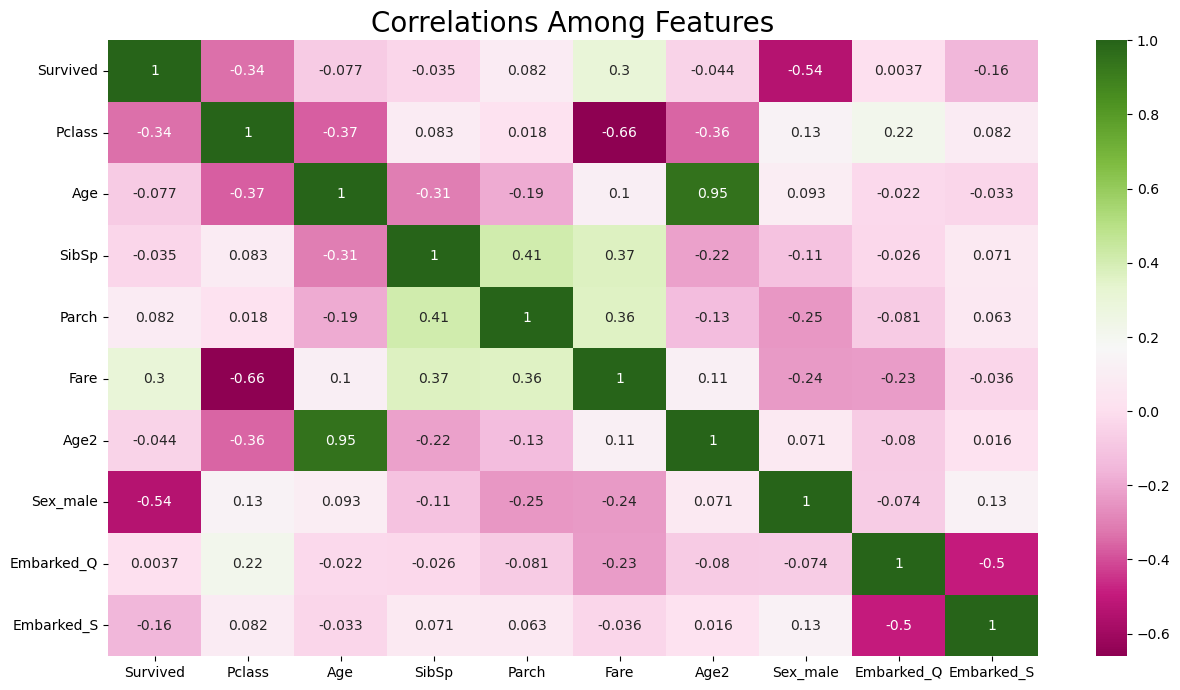

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize = (15,8))
sns.heatmap(titanic.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 20);

**Positive Correlation Features:**
- Fare and Survived: 0.26.

There is a positive correlation between Fare and Survived rated. This can be explained by saying that, the passenger who paid more money for their ticket were more likely to survive. 

**Negative Correlation Features:**
- Fare and Pclass: -0.55
 - This relationship can be explained by saying that first class passenger(1) paid more for fare then second class passenger(2), similarly second class passenger paid more than the third class passenger(3). 
- Gender and Survived: -0.54
 - Basically is the info of whether the passenger was male or female.
- Pclass and Survived: -0.34

**Gender and Survived**


([<matplotlib.axis.XTick at 0x251232f7a00>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

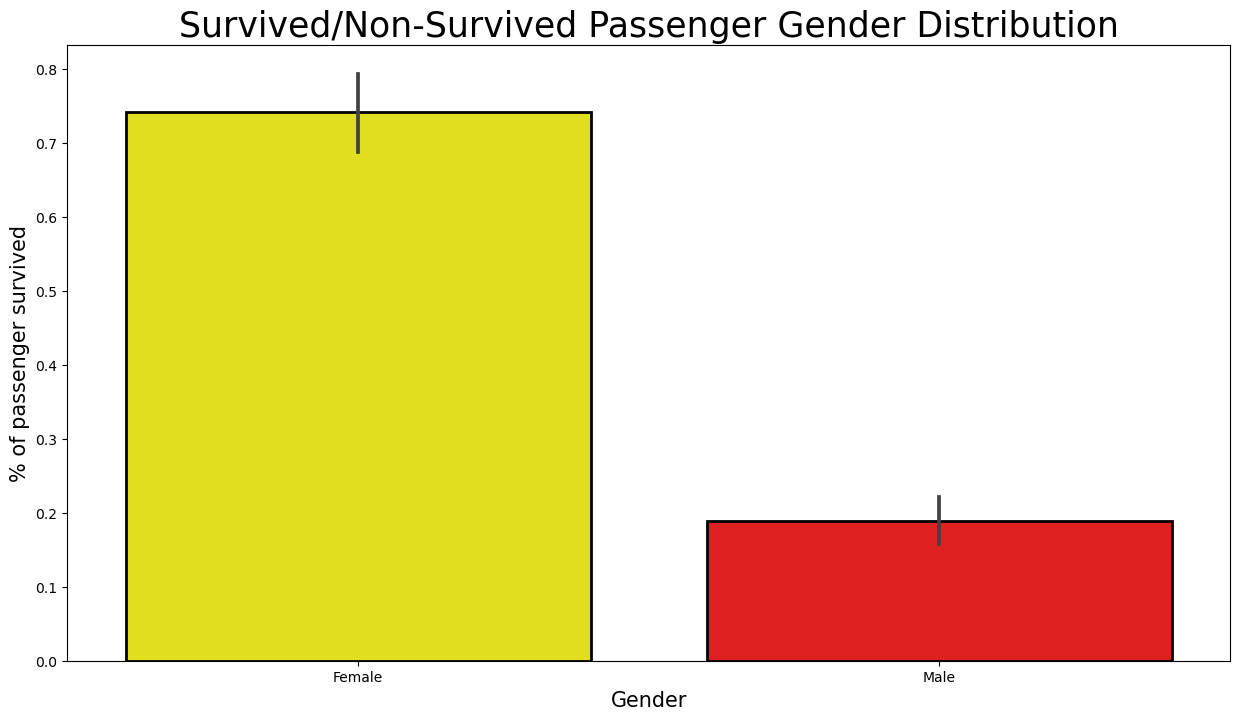

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize = (15,8))
sns.barplot(x = "Sex_male", y = "Survived", data=titanic, edgecolor=(0,0,0), linewidth=2, palette=['yellow','red'])
plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 25)
labels = ['Female', 'Male']
plt.ylabel("% of passenger survived", fontsize = 15)
plt.xlabel("Gender",fontsize = 15)
plt.xticks(sorted(titanic.Sex_male.unique()), labels)

# 1 is for male and 0 is for female.

This bar plot above shows the distribution of female and male survived. The x_label shows gender and the y_label shows % of passenger survived. This bar plot shows that 74% female passenger survived while only ~19% male passenger survived.

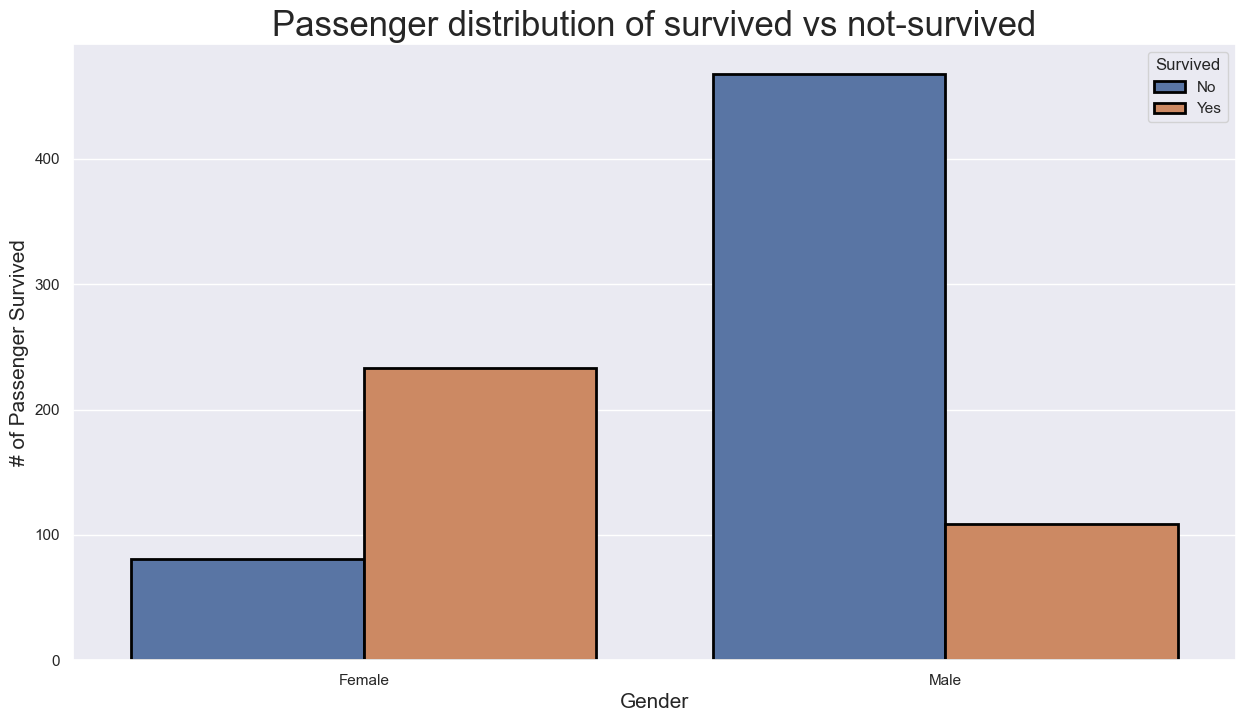

In [38]:
sns.set(style='darkgrid')
plt.subplots(figsize = (15,8))
ax=sns.countplot(x='Sex_male',data=titanic,hue='Survived',edgecolor=(0,0,0),linewidth=2)
titanic.shape
## Fixing title, xlabel and ylabel
plt.title('Passenger distribution of survived vs not-survived',fontsize=25)
plt.xlabel('Gender',fontsize=15)
plt.ylabel("# of Passenger Survived", fontsize = 15)
labels = ['Female', 'Male']
#Fixing xticks.
plt.xticks(sorted(titanic.Survived.unique()),labels)
## Fixing legends
leg = ax.get_legend()
leg.set_title('Survived')
legs=leg.texts
legs[0].set_text('No')
legs[1].set_text('Yes')


In [39]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,3,22.0,1,0,0,1,1,0,1
2,1,1,38.0,1,0,3,2,0,0,0
3,1,3,26.0,0,0,0,1,0,0,1
4,1,1,35.0,1,0,3,2,0,0,1
5,0,3,35.0,0,0,1,2,1,0,1


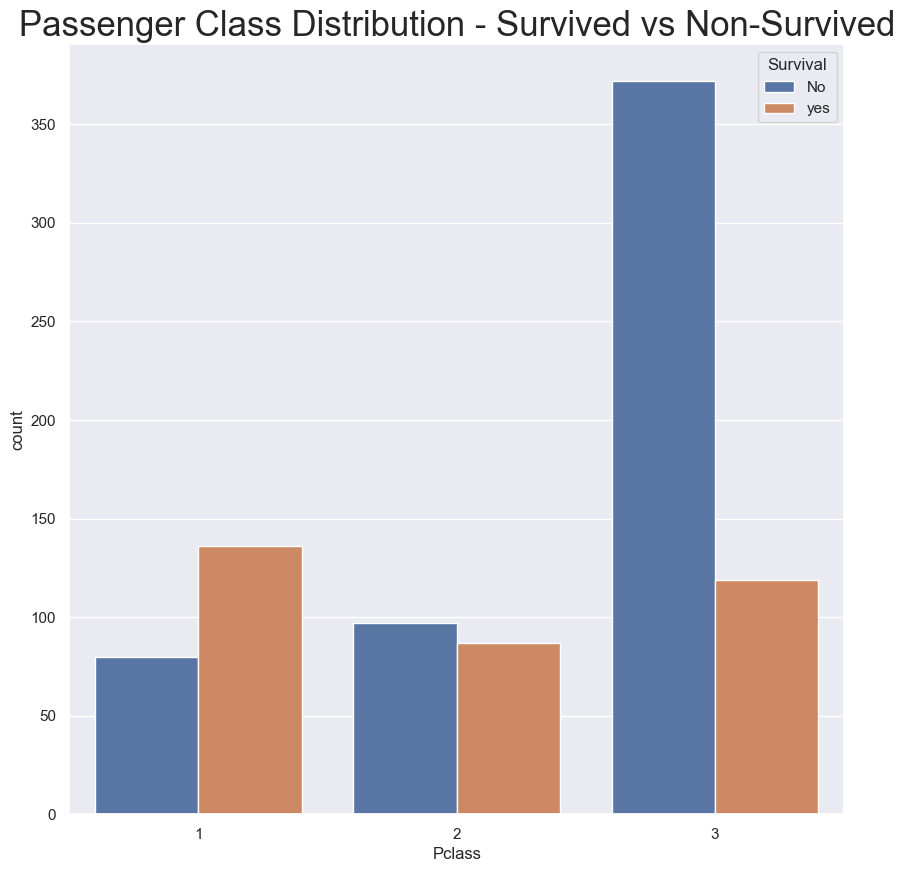

In [40]:
plt.subplots(figsize = (10,10))
ax=sns.countplot(x='Pclass',hue='Survived',data=titanic)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25)
leg=ax.get_legend()
leg.set_title('Survival')
legs=leg.texts

legs[0].set_text('No')
legs[1].set_text("yes")

So it clearly seems that,The survival of the people belong to 3rd class is very least.
It looks like ...
-  63% first class passenger survived titanic tragedy, while
-  48% second class and
-  only 24% third class passenger survived.

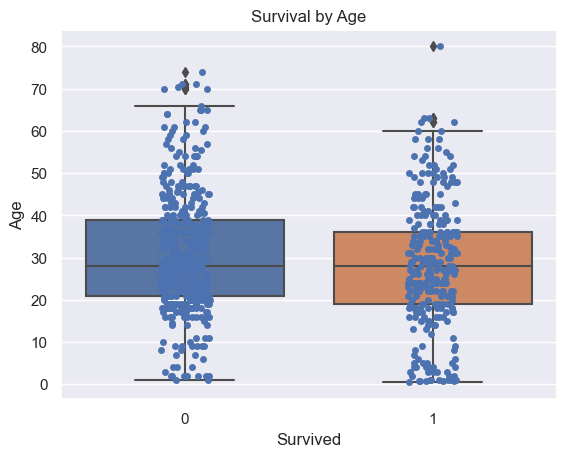

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.boxplot(x="Survived", y="Age", data=titanic)
ax = sns.stripplot(x="Survived", y="Age", data=titanic, jitter=True, edgecolor="gray")
plt.title("Survival by Age", fontsize=12)
plt.show()


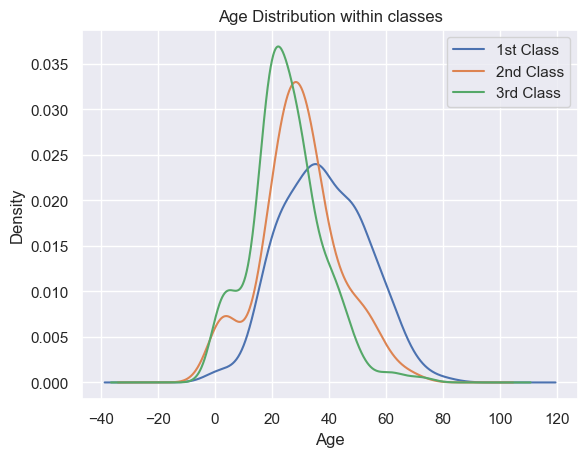

In [42]:
titanic.Age[titanic.Pclass == 1].plot(kind='kde')    
titanic.Age[titanic.Pclass == 2].plot(kind='kde')
titanic.Age[titanic.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') ;

In [43]:
titanic.drop('Age',axis=1,inplace=True)

C:\Users\Nehal\AppData\Local\Temp\ipykernel_11092\412433708.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(titanic.loc[(titanic['Survived'] == 0),'Pclass'],shade=True,color='r',label='Not Survived')
C:\Users\Nehal\AppData\Local\Temp\ipykernel_11092\412433708.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(titanic.loc[(titanic['Survived'] == 1),'Pclass'],shade=True,color='b',label='Survived' )


([<matplotlib.axis.XTick at 0x2511bea31f0>,
 [Text(1, 0, 'First'), Text(2, 0, 'Second'), Text(3, 0, 'Third')])

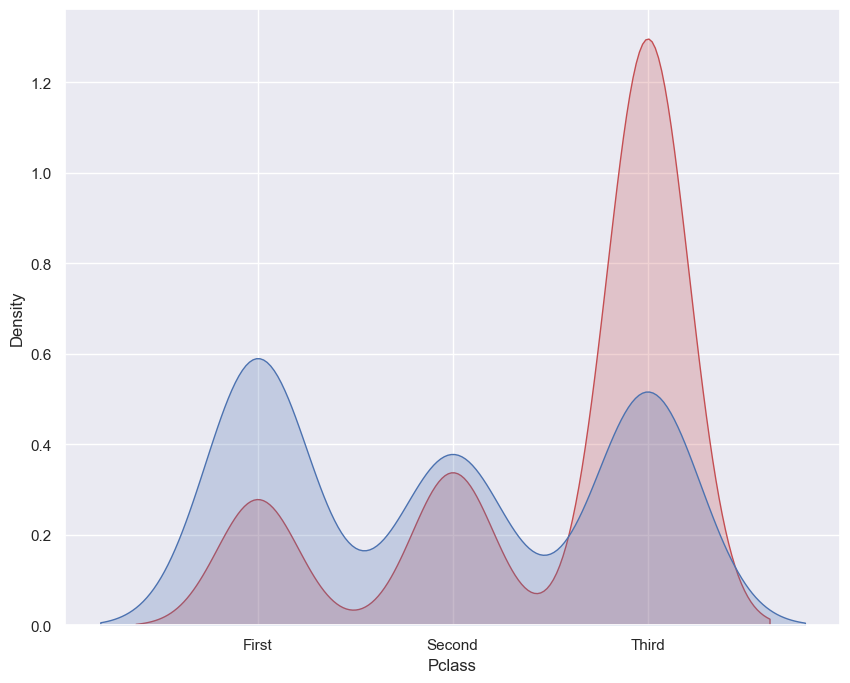

In [44]:
plt.subplots(figsize=(10,8))
sns.kdeplot(titanic.loc[(titanic['Survived'] == 0),'Pclass'],shade=True,color='r',label='Not Survived')
ax=sns.kdeplot(titanic.loc[(titanic['Survived'] == 1),'Pclass'],shade=True,color='b',label='Survived' )

labels = ['First', 'Second', 'Third']
plt.xticks(sorted(titanic.Pclass.unique()),labels)

This kde plot is pretty self explanatory with all the labels and colors. Something I have noticed that some readers might find questionable is that in, the plot; the third class passengers have survived more than second class passnegers. It is true since there were a lot more third class passengers than first and second.



**Summary**

First class passenger had the upper hand during the tragedy than second and third class passengers. You can probably agree with me more on this, when we look at the distribution of ticket fare and survived column.

**Fare and Survived**

C:\Users\Nehal\AppData\Local\Temp\ipykernel_11092\2266480426.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(titanic.loc[(titanic['Survived'] == 0),'Fare'],color='r',shade=True,label='Not Survived')
C:\Users\Nehal\AppData\Local\Temp\ipykernel_11092\2266480426.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(titanic.loc[(titanic['Survived'] == 1),'Fare'],color='b',shade=True,label='Survived' )


Text(0.5, 0, 'Fare')

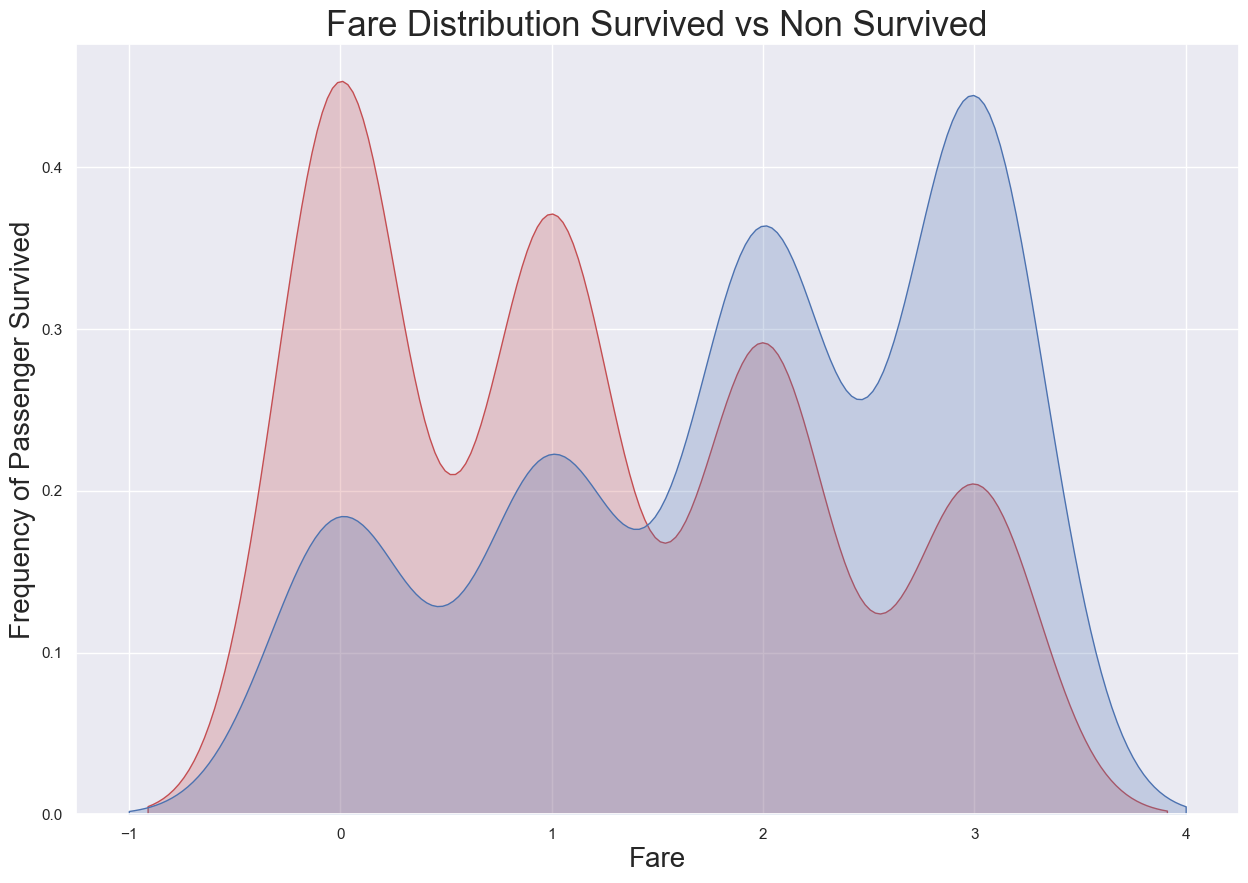

In [45]:
plt.subplots(figsize=(15,10))

ax=sns.kdeplot(titanic.loc[(titanic['Survived'] == 0),'Fare'],color='r',shade=True,label='Not Survived')
ax=sns.kdeplot(titanic.loc[(titanic['Survived'] == 1),'Fare'],color='b',shade=True,label='Survived' )
plt.title('Fare Distribution Survived vs Non Survived',fontsize=25)
plt.ylabel('Frequency of Passenger Survived',fontsize=20)
plt.xlabel('Fare',fontsize=20)

**Age and Survived**

C:\Users\Nehal\AppData\Local\Temp\ipykernel_11092\3291327871.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(titanic.loc[(titanic['Survived']==0),'Age2'],color='r',shade=True,label='Not Survived')
C:\Users\Nehal\AppData\Local\Temp\ipykernel_11092\3291327871.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(titanic.loc[(titanic['Survived']==1),'Age2'],color='b',shade=True,label='Survived')


<Axes: xlabel='Age2', ylabel='Density'>

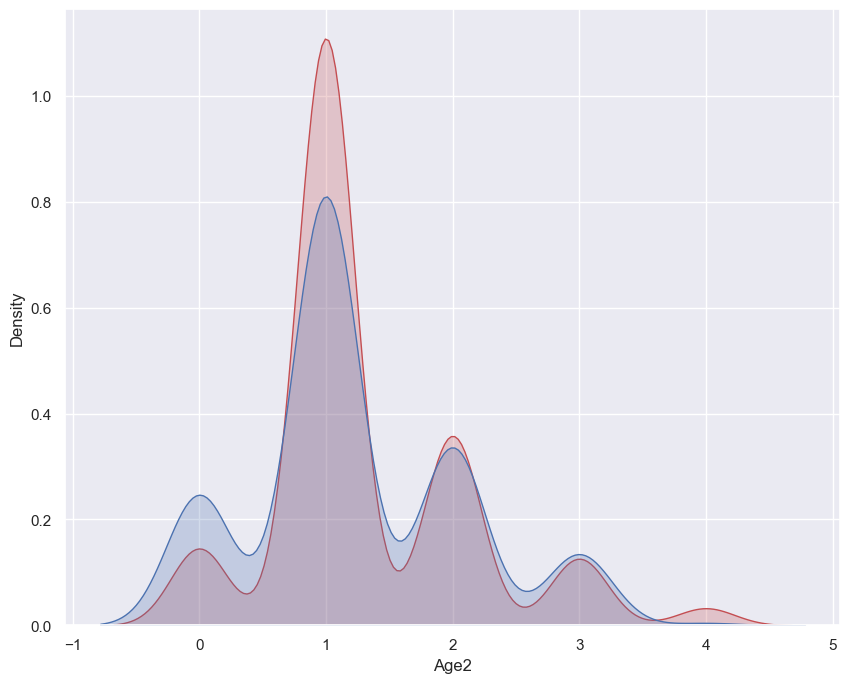

In [46]:
#fig,axs=plt.subplots(nrows=2)
fig,axs=plt.subplots(figsize=(10,8))
sns.set_style(style='darkgrid')
sns.kdeplot(titanic.loc[(titanic['Survived']==0),'Age2'],color='r',shade=True,label='Not Survived')
sns.kdeplot(titanic.loc[(titanic['Survived']==1),'Age2'],color='b',shade=True,label='Survived')


There is nothing out of the ordinary of about this plot, except the very left part of the distribution. It shows that

children and infants were the priority.

**Modeling the Data**

I will train the data with the following models:
- Logistic Regression
- Gaussian Naive Bayes
- Support Vector Machines
- Decision Tree Classifier
- K-Nearest Neighbors(KNN)
 -  and many other.....

In [47]:
X=titanic.drop('Survived',axis=1)
y=titanic['Survived'].astype(int)


<h2>Classifier Comparision</h2>

By Classifier Comparison we choose which model best for the given data.

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis 
from xgboost import XGBClassifier

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    XGBClassifier(),
    RandomForestClassifier(n_estimators=100, max_features=3),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]
    


log_cols = ["Classifier", "Accuracy"]
log= pd.DataFrame(columns=log_cols)


In [49]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
acc_dict = {}

for train_index, test_index in sss.split(X, y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
    
        clf.fit(X_train,y_train)
        predict=clf.predict(X_test)
        acc=accuracy_score(y_test,predict)
        if name in acc_dict:
            acc_dict[name]+=acc
        else:
            acc_dict[name]=acc

Text(0.5, 1.0, 'Classifier Accuracy')

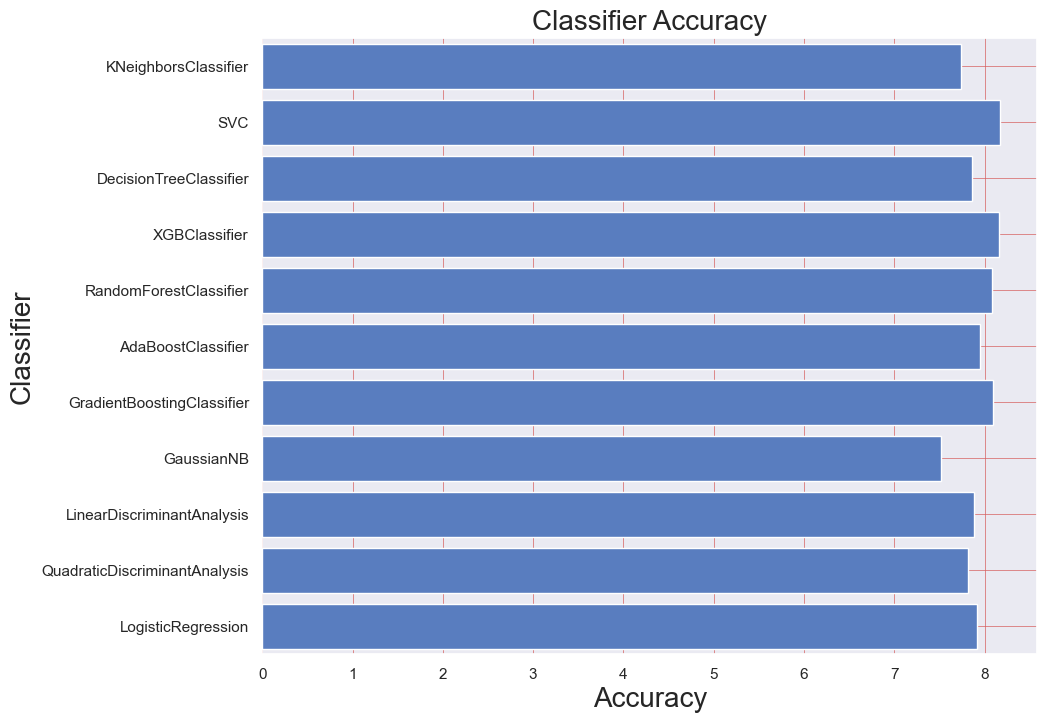

In [50]:
log['Classifier']=acc_dict.keys()
log['Accuracy']=acc_dict.values()
log.set_index([[0,1,2,3,4,5,6,7,8,9,10]])
%matplotlib inline
sns.set_color_codes("muted")
ax=plt.subplots(figsize=(10,8))
ax=sns.barplot(y='Classifier',x='Accuracy',data=log,color='b')
ax.set_xlabel('Accuracy',fontsize=20)
plt.ylabel('Classifier',fontsize=20)
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title('Classifier Accuracy',fontsize=20)


From the above barplot, we can clearly see that the accuracy of the SVC classifier is best out of all other classifiers..

Lets apply this to our test data.

In [51]:
titanic.head()

,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,1,0,0,1,1,0,1
2,1,1,1,0,3,2,0,0,0
3,1,3,0,0,0,1,0,0,1
4,1,1,1,0,3,2,0,0,1
5,0,3,0,0,1,2,1,0,1


In [53]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define features and target variable
X = titanic[['Pclass', 'SibSp', 'Parch', 'Fare', 'Age2', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = titanic['Survived']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVC classifier
classifier = SVC()

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8156424581005587
